In [1]:
180/190

0.9473684210526315

In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import linalg


---
# VIDEO: The quadratic form in algbebra
---


$ax^2 + 2bxy + dy^2$

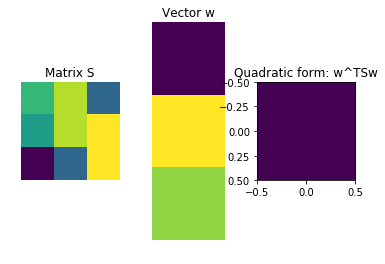

In [21]:


# matrix and vector
S = [ [1, 3, -2], 
      [0, 3, 4],
      [-5, -2, 4] ]

w = np.transpose([ [-2, 4, 3] ])

# compute the quadratic form
qf = np.transpose(w)@S@w

n = len(w) # used for plotting

# show the matrices
plt.subplot(131)
plt.imshow(S)
plt.axis('off')
plt.title('Matrix S')

plt.subplot(132)
plt.imshow(w)
plt.axis('off')
plt.title('Vector w')

plt.subplot(133)
plt.imshow(qf)
plt.title('Quadratic form: w^TSw')

plt.show()


---
# VIDEO: The quadratic form in geometry
---


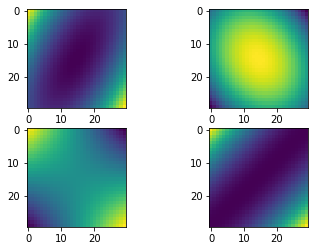

In [18]:
# some different matrices
S = np.zeros((4,), dtype=np.object)
S[0] = [ [4,4], [4,9] ]
S[1] = [ [-4,-1], [3,-5] ]
S[2] = [ [0,1], [2,0] ]
S[3] = [ [1,1], [1,1] ]

# range for vector w
n = 30
wRange = np.linspace(-2,2,n)

# initialize quadratic form matrix
qf = np.zeros( (len(wRange),len(wRange)) )


for i in range(4):
    
    # compute QF
    for xi in range(n):
        for yi in range(n):
            # this w
            w = np.transpose([ wRange[xi], wRange[yi] ])
            
            # QF
            qf[xi,yi] = np.transpose(w)@S[i]@w
    
    # show the map
    plt.subplot(2,2,i+1)
    plt.imshow(qf)

plt.show()

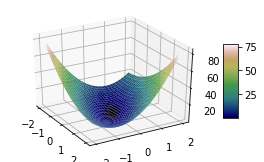

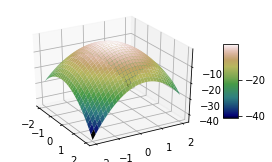

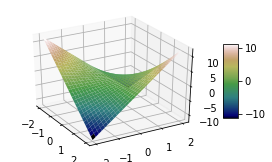

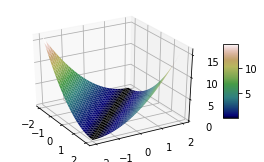

In [20]:
# 3D plotting code, contributed by student Laurens Sandt

for i in range(4):
    
    for xi in range(n):
        for yi in range(n):
            w = np.array([ wRange[xi], wRange[yi] ])
            qf[xi,yi] = w.T@S[i]@w

    # show the map 
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(221+i, projection='3d')
    X,Y = np.meshgrid(wRange,wRange)
    Z = qf.T
    mycmap = plt.get_cmap('gist_earth')
    surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap)
    fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
    
    # play with the azim and elevation to look at the plot from different perspectives
    ax1.view_init(azim=-30, elev=30)

plt.show()

Normalized quadratic form

General:

$argmax_{w}\big\{\frac{ w^TSw}{w^Tw}\big\}$

For $\mathbb{R^2}$:

$\frac{ax^2 + 2bxy + dy^2}{x^2 + y^2}$

# Implement raw and normalized quadratic form

In [45]:
A = np.array([[-2, 3], [2, 8]])
n = 40
xi = np.linspace(-2, 2, n)

qf = np.zeros((n,n))
qfN = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        #x = x.append([xi[i], xi[j]])
        x = xi[i], xi[j]
        qf[i, j] = np.transpose(x) @ A @ x
        qfN[i, j] = (np.transpose(x) @ A @ x) / (np.transpose(x) @ x)

In [59]:
import pandas as pd
pd.DataFrame(qf)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,44.000000,39.776463,35.721236,31.834320,28.115713,24.565417,21.183432,17.969757,14.924392,12.047337,...,-9.491124,-8.665352,-7.671269,-6.508876,-5.178172,-3.679158,-2.011834,-0.176200,1.827745,4.000000
1,43.773833,39.602893,35.600263,31.765943,28.099934,24.602235,21.272847,18.111769,15.119001,12.294543,...,-8.139382,-7.261012,-6.214333,-4.999343,-3.616042,-2.064431,-0.344510,1.543721,3.600263,5.825115
2,43.505588,39.387245,35.437212,31.655490,28.042078,24.596976,21.320184,18.211703,15.271532,12.499671,...,-6.829717,-5.898751,-4.799474,-3.531887,-2.095989,-0.491782,1.280736,3.221565,5.330703,7.608153
3,43.195266,39.129520,35.232084,31.502959,27.942143,24.549638,21.325444,18.269560,15.381986,12.662722,...,-5.562130,-4.578567,-3.426693,-2.106509,-0.618014,1.038790,2.863905,4.857331,7.019066,9.349112
4,42.842867,38.829717,34.984878,31.308350,27.800131,24.460224,21.288626,18.285339,15.450362,12.783695,...,-4.336621,-3.300460,-2.095989,-0.723208,0.817883,2.527285,4.404997,6.451019,8.665352,11.047995
5,42.448389,38.487837,34.695595,31.071663,27.616042,24.328731,21.209730,18.259040,15.476660,12.862590,...,-3.153189,-2.064431,-0.807364,0.618014,2.211703,3.973702,5.904011,8.002630,10.269560,12.704799
6,42.011834,38.103879,34.364234,30.792899,27.389875,24.155161,21.088757,18.190664,15.460881,12.899408,...,-2.011834,-0.870480,0.439185,1.917160,3.563445,5.378041,7.360947,9.512163,11.831690,14.319527
7,41.533202,37.677844,33.990796,30.472058,27.121631,23.939513,20.925707,18.080210,15.403024,12.894149,...,-0.912558,0.281394,1.643655,3.174227,4.873110,6.740302,8.775805,10.979619,13.351742,15.892176
8,41.012492,37.209730,33.575279,30.109139,26.811308,23.681788,20.720579,17.927679,15.303090,12.846811,...,0.144642,1.391190,2.806049,4.389218,6.140697,8.060487,10.148586,12.404997,14.829717,17.422748
9,40.449704,36.699540,33.117686,29.704142,26.458909,23.381986,20.473373,17.733070,15.161078,12.757396,...,1.159763,2.458909,3.926364,5.562130,7.366206,9.338593,11.479290,13.788297,16.265615,18.911243


In [47]:
len(qf)

40

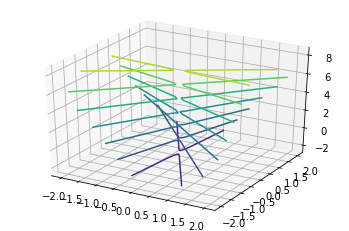

In [48]:
# show the matrices
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xi, xi, qfN)




In [49]:
xi

array([-2.        , -1.8974359 , -1.79487179, -1.69230769, -1.58974359,
       -1.48717949, -1.38461538, -1.28205128, -1.17948718, -1.07692308,
       -0.97435897, -0.87179487, -0.76923077, -0.66666667, -0.56410256,
       -0.46153846, -0.35897436, -0.25641026, -0.15384615, -0.05128205,
        0.05128205,  0.15384615,  0.25641026,  0.35897436,  0.46153846,
        0.56410256,  0.66666667,  0.76923077,  0.87179487,  0.97435897,
        1.07692308,  1.17948718,  1.28205128,  1.38461538,  1.48717949,
        1.58974359,  1.69230769,  1.79487179,  1.8974359 ,  2.        ])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


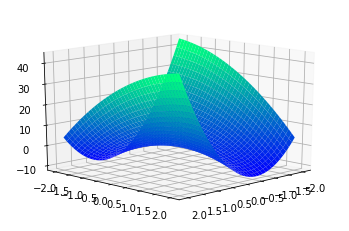

In [90]:
plt.close()

# show the matrices
fig = plt.figure()
ax = fig.gca(projection='3d')
surX, surY = np.meshgrid(xi, xi)
surf1 = ax.plot_surface(surX, surY, qf, cmap='winter')
ax.view_init(azim=45, elev=16)
fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


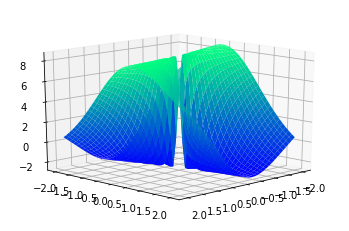

In [91]:
# show the matrices
plt.close()
fig = plt.figure()
ax = fig.gca(projection='3d')
surX, surY = np.meshgrid(xi, xi)
surf1 = ax.plot_surface(surX, surY, qfN, cmap='winter')
ax.view_init(azim=45, elev=16)
fig.show()


---
# VIDEO: Eigenvectors and the quadratic form surface
---


[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


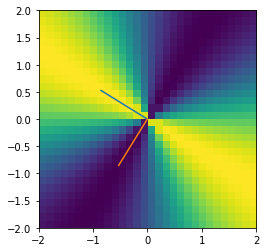

In [11]:
# a happy little symmetric matrix
A = [ [1,2],[2,3] ]

# range for vector w
n = 30
wRange = np.linspace(-2,2,n)

# initialize quadratic form matrix
qf = np.zeros( (len(wRange),len(wRange)) )

# compute QF
for xi in range(n):
    for yi in range(n):
        # this w
        w = np.transpose([ wRange[xi], wRange[yi] ])

        # QF
        qf[xi,yi] = np.transpose(w)@A@w / (np.transpose(w)@w)


# compute eigendecomposition
D,V = np.linalg.eig(A)

# show the surface
plt.imshow(qf,extent=[-2,2,-2,2])

# show the eigenvectors
plt.plot( [0,V[0,0]],[0,V[1,0]]  )
plt.plot( [0,V[0,1]],[0,V[1,1]]  )
print(V)
plt.show()



---
VIDEO: Application of the normalized quadratic form: PCA
---


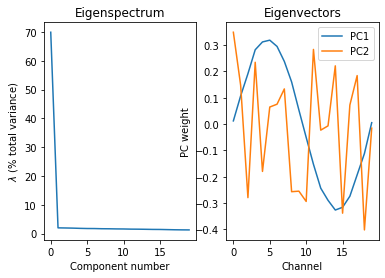

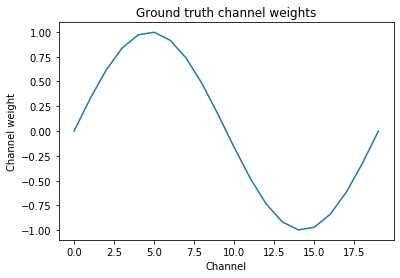

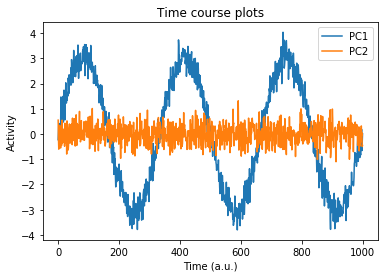

In [92]:
# simulation parameters
N = 1000 # time points
M =   20 # channels

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))

# initialize data
data = np.zeros((M,N))

# create dataset
for i in np.arange(0,M):
    data[i,:] = np.sin(t) * chanrel[i]

# add noise
data = data + np.random.randn(M,N)/3
    
# mean-center
for i in np.arange(0,M):
    data[i,:] = data[i,:] - np.mean(data[i,:])


# compute covariance matrix
covmat = data@data.T/(N-1)

# eigendecomposition of the covariance matrix
evals,evecs = np.linalg.eig( covmat )

# sort eigenvalues and eigenvectors
idx = evals.argsort()[::-1]   
evals = np.real( evals[idx] )
evecs = evecs[:,idx]

# convert eigenvalues to percent variance explained
evals = 100*evals/np.sum(evals)


# compute component time series
r = 2 # two components
comp_time_series = evecs[:,0:r].T@data


# visualize and interpret the results

# eigenvalues
plt.subplot(121)
plt.plot(evals)
plt.xlabel('Component number')
plt.ylabel('$\lambda$ (% total variance)')
plt.title('Eigenspectrum')

# eigenvectors
plt.subplot(122)
plt.plot(evecs[:,0],label='PC1')
plt.plot(evecs[:,1],label='PC2')
plt.xlabel('Channel')
plt.ylabel('PC weight')
plt.title('Eigenvectors')
plt.legend()
plt.show()

# original channel modulator
plt.plot(chanrel)
plt.xlabel('Channel')
plt.ylabel('Channel weight')
plt.title('Ground truth channel weights')
plt.show()

# component time series
plt.plot(comp_time_series[0,:],label='PC1')
plt.plot(comp_time_series[1,:],label='PC2')
plt.xlabel('Time (a.u.)')
plt.ylabel('Activity')
plt.legend()
plt.title('Time course plots')
plt.show()

# Quadratic form of generalized eigenvectors

In [93]:
# create two symmetric matrices
m = 14
n = 1000

# create A as random sine-modulated noise, then its covariance matrix
A = np.zeros((m,n))
for i in range(0,n):
    A[:,i] = np.random.randn(m) * np.cos(np.linspace(0,np.pi,m))
A = A@A.T


# B is the same thing, just different random numbers
B = np.zeros((m,n))
for i in range(0,n):
    B[:,i] = np.random.randn(m) * np.cos(np.linspace(0,np.pi,m))
B = B@B.T

# generalized eigendecomposition
evals,evecs = linalg.eig(A,B)

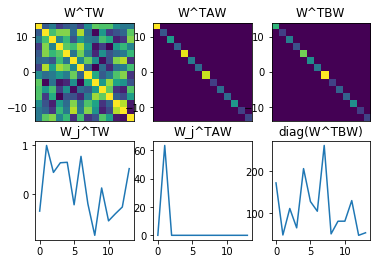

In [94]:
## some plotting

# W'W
plt.subplot(231)
plt.imshow(evecs.T@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W^TW')

# one row of W'W
tmp = evecs.T@evecs
plt.subplot(234)
plt.plot(tmp[1,:])
plt.title('W_j^TW')

# W'AW
plt.subplot(232)
plt.imshow(evecs.T@A@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W^TAW')

# one row of W'AW
tmp = evecs.T@A@evecs
plt.subplot(235)
plt.plot(tmp[1,:])
plt.title('W_j^TAW')

# W'BW
plt.subplot(233)
plt.imshow(evecs.T@B@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W^TBW')

# diagonal of W'BW
plt.subplot(236)
plt.plot(np.diag(evecs.T@B@evecs))
plt.title('diag(W^TBW)')

plt.show()


In [95]:
A = [[1,2,3],
     [2,3,7],
     [3,7,1]];
B = [[11,1,4],
     [1,11,2],
     [4,2,11]];

D,V = linalg.eig(A,B)
print(D)

[ 0.71245548+0.j -0.01319932+0.j -0.66699809+0.j]



---
VIDEO: Matrix definiteness, geometry, and eigenvalues
---


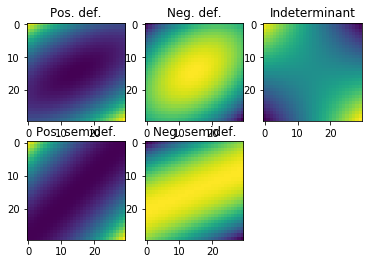

In [96]:
# some different matrices
S = np.zeros((5,), dtype=np.object)
S[0] = [ [4,4], [4,9] ]
S[1] = [ [-4,-1], [-3,-5] ]
S[2] = [ [0,1], [2,0] ]
S[3] = [ [1,1], [1,1] ]
S[4] = [ [-1,-2], [-3,-6] ]



# range for vector w
n = 30
wRange = np.linspace(-2,2,n)

# initialize quadratic form matrix
qf = np.zeros( (len(wRange),len(wRange)) )


for i in range(5):
    
    # compute QF
    for xi in range(n):
        for yi in range(n):
            # this w
            w = np.transpose([ wRange[xi], wRange[yi] ])
            
            # QF
            qf[xi,yi] = np.transpose(w)@S[i]@w
    
    # show the map
    plt.subplot(2,3,i+1)
    plt.imshow(qf.T)
    
    ## compute the matrix's definiteness based on the eigenvalues
    
    # get eigenvalues
    evals = np.linalg.eig(S[i])
    
    # we care about their signs
    esign = np.sign(evals[0])
    
    # test for signs (note: this test is valid only for 2x2 matrices!)
    if sum(esign)==2:
        defcat = 'Pos. def.'
    elif sum(esign)==1:
        defcat = 'Pos. semidef.'
    elif sum(esign)==0:
        defcat = 'Indeterminant'
    elif sum(esign)==-1:
        defcat = 'Neg. semidef.'
    elif sum(esign)==-2:
        defcat = 'Neg. def.'
    
    # add title
    plt.title(defcat)

plt.show()